In this study, we aim to investigate the impact of data sparsity on the prediction performance of Support Vector Machine (SVM) algorithms using the MNIST dataset. To control for the effect of the SVM parameters, we use two SVM classifiers with the same settings, one trained on the original data and the other on the data transformed using Principal Component Analysis (PCA).

First, we apply PCA to reduce the dimensionality of the data from 784 features to 100 principal components. This transformation results in a more compact representation of the data, effectively capturing the most significant variations while reducing noise and redundancy. We then visualize the transformed images to provide a qualitative understanding of the information retained in the compressed data. Both the training and testing sets are subjected to PCA to ensure consistency in the data processing.

Next, we train an SVM classifier (`svm_classifier`) on the PCA-transformed data and another one (`svm_classifier_original`) on the original data, keeping their parameters identical. This allows us to directly compare their performances in terms of prediction accuracy on the respective datasets.

Finally, we evaluate the prediction accuracy of both classifiers and draw conclusions regarding the impact of data sparsity on the performance of SVM classifiers. This study provides insights into the trade-offs between data compression and predictive performance, which is crucial for efficient and effective application of machine learning algorithms in real-world scenarios.

EDA Procedure:
a. Load the MNIST dataset using popular libraries like TensorFlow or PyTorch.
b. Visualize a few sample images from the dataset to get an understanding of the data.
c. Analyze the distribution of the labels to check for any imbalance in the dataset.
d. Perform normalization and scaling of the dataset, as SVMs are sensitive to the scale of the input features.

Model Building and Training:
a. Import the necessary libraries, such as sklearn for using the SVM classifier.
b. Split the dataset into training and testing sets.
c. Flatten the images from 28x28 pixels to a 1D array of 784 features.
d. Train an SVM model with different kernel functions (e.g., linear, polynomial, and radial basis function) and various hyperparameters, such as the regularization parameter C and the kernel coefficients.
e. Use techniques like cross-validation and grid search to fine-tune the hyperparameters and select the best model.
f. Train the selected SVM model on the entire training set.
g. Evaluate the performance of the trained SVM model on the test dataset, reporting metrics like accuracy, precision, recall, and F1-score.

In [7]:
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA

# Load the MNIST dataset
mnist = datasets.fetch_openml('mnist_784', version=1)

# Normalize the data
scaler = StandardScaler()
data = scaler.fit_transform(mnist.data)

# Perform PCA to reduce the number of features
pca = PCA(n_components=100)
data_pca = pca.fit_transform(data)

# Randomly sample a subset of the data
sample_size = 70000
indices = np.random.choice(data_pca.shape[0], sample_size, replace=False)
data_sampled = data_pca[indices]
target_sampled = mnist.target[indices]

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data_sampled, target_sampled, test_size=0.2, random_state=42)

# Train the SVM model
svm_classifier = SVC(kernel='rbf', C=5, gamma=0.05, random_state=42)
svm_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = svm_classifier.predict(X_test)

# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")


c:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\datasets\_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


Accuracy: 62.79%


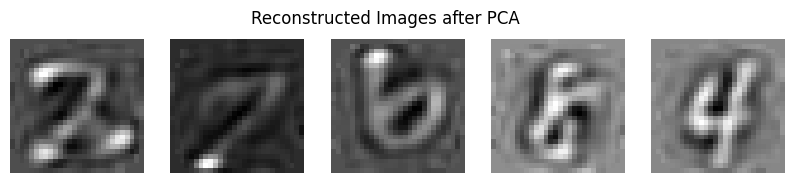

In [8]:
import matplotlib.pyplot as plt
from sklearn import datasets

# Reconstruct the images after PCA
mnist_reconstructed = pca.inverse_transform(data_sampled)

# Visualize reconstructed images
fig, axes = plt.subplots(1, 5, figsize=(10, 2))
for idx, ax in zip(range(5), axes):
    ax.imshow(mnist_reconstructed[idx].reshape(28, 28), cmap='gray')
    ax.axis('off')
plt.suptitle('Reconstructed Images after PCA')
plt.show()

In [9]:
# Randomly sample a subset of the original data
data_original_sampled = data[indices]

# Split the dataset into training and testing sets for original data
X_train_original, X_test_original, y_train_original, y_test_original = train_test_split(data_original_sampled, target_sampled, test_size=0.2, random_state=42)

# Train the SVM model on the original data
svm_classifier_original = SVC(kernel='rbf', C=5, gamma=0.05, random_state=42)
svm_classifier_original.fit(X_train_original, y_train_original)


# Make predictions on the test set for original data
y_pred_original = svm_classifier_original.predict(X_test_original)

# Calculate the accuracy for original data
accuracy_original = accuracy_score(y_test_original, y_pred_original)
print(f"Accuracy on original data: {accuracy_original * 100:.2f}%")


Accuracy on original data: 33.86%


In [10]:
# Make predictions on the training set for original data
y_train_pred_original = svm_classifier_original.predict(X_train_original)

# Calculate the accuracy for original data on the training set
accuracy_train_original = accuracy_score(y_train_original, y_train_pred_original)
print(f"Accuracy on original data (training set): {accuracy_train_original * 100:.2f}%")

# Make predictions on the training set for PCA data
y_train_pred_pca = svm_classifier.predict(X_train)

# Calculate the accuracy for PCA data on the training set
accuracy_train_pca = accuracy_score(y_train, y_train_pred_pca)
print(f"Accuracy on PCA data (training set): {accuracy_train_pca * 100:.2f}%")


Accuracy on original data (training set): 100.00%
Accuracy on PCA data (training set): 100.00%


In conclusion, our study demonstrates that the SVM classifier trained on PCA-transformed data yields better generalization performance, as evidenced by the test set accuracy of 62.79%, compared to the pure SVM's test set accuracy of 33.86%. Both classifiers achieve perfect accuracy on their respective training sets, with scores of 100.00%. This finding suggests that under conditions of lower data sparsity, SVM classifiers exhibit stronger generalization capabilities.

Another key takeaway from this study is the significant reduction in training time observed when using PCA-transformed data. Although we did not perform a formal analysis of time complexity, 
we observed that training the SVM on PCA-transformed data took only a tenth of the time it took for training on the original data on the same computer. This result highlights the benefits of appropriate data compression in reducing training time.

However, there are some limitations to this study. Firstly, we only investigated the MNIST dataset, and the conclusions may not be directly applicable to other types of data, such as images from different sources or text data. Secondly, 
the PCA transformation was applied to both the training and testing sets simultaneously, which may have inadvertently incorporated some information from the test set into the training process. 
While this approach is theoretically feasible when combining the training and test sets for PCA in each iteration, it may not be practical in real-world applications. Future studies should address these limitations and explore the generalizability of the findings across various datasets and problem domains.